In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
learning_rate = 0.01
training_epochs = 1000
dispaly_step = 50

In [5]:
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(),name="weight")
b = tf.Variable(np.random.randn(),name="bias")

In [7]:
pred = tf.add(tf.multiply(X,W),b)

In [8]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.151966304 W= 0.4027413 b= -0.3002676
Epoch: 0100 cost= 0.143300429 W= 0.39363292 b= -0.23474218
Epoch: 0150 cost= 0.135635450 W= 0.38506627 b= -0.17311391
Epoch: 0200 cost= 0.128855839 W= 0.37700903 b= -0.11515115
Epoch: 0250 cost= 0.122859351 W= 0.36943108 b= -0.060635556
Epoch: 0300 cost= 0.117555544 W= 0.36230382 b= -0.009362348
Epoch: 0350 cost= 0.112864465 W= 0.35560033 b= 0.0388615
Epoch: 0400 cost= 0.108715363 W= 0.34929565 b= 0.084217176
Epoch: 0450 cost= 0.105045624 W= 0.34336588 b= 0.12687534
Epoch: 0500 cost= 0.101799943 W= 0.3377888 b= 0.16699651
Epoch: 0550 cost= 0.098929301 W= 0.3325434 b= 0.20473132
Epoch: 0600 cost= 0.096390411 W= 0.32761002 b= 0.24022184
Epoch: 0650 cost= 0.094144963 W= 0.32297006 b= 0.27360168
Epoch: 0700 cost= 0.092159010 W= 0.31860593 b= 0.30499664
Epoch: 0750 cost= 0.090402655 W= 0.31450143 b= 0.33452386
Epoch: 0800 cost= 0.088849314 W= 0.3106411 b= 0.36229527
Epoch: 0850 cost= 0.087475583 W= 0.30701023 b= 0.38841546
Epoch: 0900

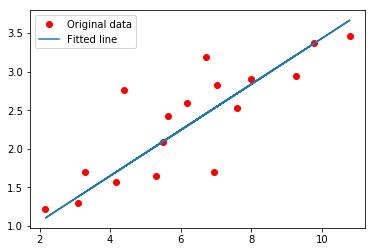

In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for(x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        if(epoch+1) % dispaly_step ==0:
            c=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:",'%04d' % (epoch+1),"cost=","{:.9f}".format(c),\
                 "W=",sess.run(W),"b=",sess.run(b))
            
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X,Y:train_Y})
    print("Training cost=",training_cost,"W=",sess.run(W),"b=",sess.run(b),'\n')
    
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fitted line')
    plt.legend()
    plt.show()